# Data Science Project - Wrist Accelerometer Analysis
Institution: Instituto Federal de Brasília  
Developer: Pedro Plá  
Dataset: Public Dataset of Accelerometer Data for Human Motion Primitives Detection (HPD)

### Importing of relevant python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re #For extracting data from file names
import glob2 as glob #For looping over directories
import os #For looping over directories

# Data Gathering

### Dataframe creation framework
Here we create the framework for importing this not fully organized data into a dataframe, in this step, we use read_csv to create a single dataframe from a single file, later we will use this tested framework to iterate over all files.

In [4]:
folder = 'Brush_teeth'
file = "Brush_teeth/Accelerometer-2011-04-11-13-28-18-brush_teeth-f1.txt"
file_re = re.split('[/ -]',file)
df = pd.read_csv(file, sep=' ')
df.columns = ('x_axis','y_axis','z_axis')
df['file_name']=file
df['movement'] = file_re[0]
df['sex'] = file[-6]
df['date'] = file_re[2]+'-'+file_re[3]+'-'+file_re[4]
df['time'] =  file_re[5]+'h'+file_re[6]+'min'+file_re[7]
df.head()

,x_axis,y_axis,z_axis,file_name,movement,sex,date,time
0,22,49,35,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18
1,22,52,35,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18
2,22,52,35,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18
3,21,52,34,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18
4,22,51,34,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18


### Looping through all files

Goes through all directories and files on the main movements file which contains all non-model measurement data:

In [5]:
movements_folder = os.listdir('Movements')
print(movements_folder)

['Brush_teeth', 'Climb_stairs', 'Comb_hair', 'Descend_stairs', 'Drink_glass', 'Eat_meat', 'Eat_soup', 'Getup_bed', 'Liedown_bed', 'Pour_water', 'Sitdown_chair', 'Standup_chair', 'Use_telephone', 'Walk']


####  Here, we create the df_medidas concatenated dataframe by looping the function we tested on the framework creation phase. For verification purposes there's a alert for each added directory and a counter for how many files were read and aggregated

In [6]:
small_dfs = []
total_files = 0
for j in range(len(movements_folder)):
    folder = movements_folder[j]
    print(folder+ ' added')

    files=os.listdir(movements_folder[j])
    for i in range(len(os.listdir(movements_folder[j]))):
        file = folder+'/'+files[i]
        file_re = re.split('[/ -]',file)
        df = pd.read_csv(file, sep=' ')
        df.columns = ('x_axis','y_axis','z_axis')
        df['file_name']=file
        df['movement'] = file_re[0]
        df['sex'] = file_re[-1][0]
        df['date'] = file_re[2]+'-'+file_re[3]+'-'+file_re[4]
        df['time'] =  file_re[5]+'h'+file_re[6]+'min'+file_re[7]
        small_dfs.append(df)
        total_files = total_files+1

df_medidas = pd.concat(small_dfs,ignore_index=True)
print('Concatenated a total of '+str(total_files)+ ' files')

Brush_teeth added
Climb_stairs added
Comb_hair added
Descend_stairs added
Drink_glass added
Eat_meat added
Eat_soup added
Getup_bed added
Liedown_bed added
Pour_water added
Sitdown_chair added
Standup_chair added
Use_telephone added
Walk added
Concatenated a total of 839 files


This is the how the df_medidas file looks, we'll also apply some measurements for dinamically adjusting datatypes for size reduction

In [7]:
df_medidas.head()

,x_axis,y_axis,z_axis,file_name,movement,sex,date,time
0,22,49,35,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18
1,22,52,35,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18
2,22,52,35,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18
3,21,52,34,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18
4,22,51,34,Brush_teeth/Accelerometer-2011-04-11-13-28-18-...,Brush_teeth,f,2011-04-11,13h28min18


In [9]:
df_medidas.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445690 entries, 0 to 445689
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   x_axis     445690 non-null  int64 
 1   y_axis     445690 non-null  int64 
 2   z_axis     445690 non-null  int64 
 3   file_name  445690 non-null  object
 4   movement   445690 non-null  object
 5   sex        445690 non-null  object
 6   date       445690 non-null  object
 7   time       445690 non-null  object
dtypes: int64(3), object(5)
memory usage: 222.6 MB


In [10]:
#Downcasting, attempts to reduce dataframe size by changing dtype as possible
for column in df_medidas:
 if df_medidas[column].dtype == 'int64':
     df_medidas[column]=pd.to_numeric(df_medidas[column], downcast='integer')

Below we can see the final datatypes and final filesize

In [12]:
df_medidas.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445690 entries, 0 to 445689
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   x_axis     445690 non-null  int8  
 1   y_axis     445690 non-null  int8  
 2   z_axis     445690 non-null  int8  
 3   file_name  445690 non-null  object
 4   movement   445690 non-null  object
 5   sex        445690 non-null  object
 6   date       445690 non-null  object
 7   time       445690 non-null  object
dtypes: int8(3), object(5)
memory usage: 213.7 MB


Exports the final csv file:

In [34]:
df_medidas.to_csv('df_medidas.csv')

# Data Exploration

From MANUAL.txt included with the dataset, we have the information that the accelerometer is attached to the right wrist that the axes are.    
		   x axis: pointing toward the hand;  
		   y axis: pointing toward the left;  
		   z axis: perpendicular to the plane of the hand.  
Also included in the dataset, we have the date and time that the measurements were collected as well as the gender of the volunteer.
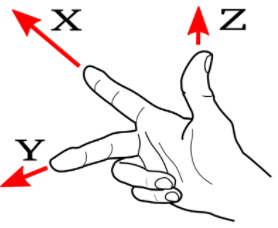

In [14]:
df=df_medidas

### Overview

In [16]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445690 entries, 0 to 445689
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   x_axis     445690 non-null  int8  
 1   y_axis     445690 non-null  int8  
 2   z_axis     445690 non-null  int8  
 3   file_name  445690 non-null  object
 4   movement   445690 non-null  object
 5   sex        445690 non-null  object
 6   date       445690 non-null  object
 7   time       445690 non-null  object
dtypes: int8(3), object(5)
memory usage: 213.7 MB


### 1 - Breakdown of sex and movement

In [17]:
df_sex = (df['sex'].value_counts()).rename_axis('sex').reset_index(name='occurrences')
df_sex

,sex,occurrences
0,f,282666
1,m,163024


In [18]:
total_rows = df_sex['occurrences'].sum(axis=0)


In [20]:
df_sex['frequency(percentage)'] = 100*df_sex['occurrences']/total_rows
df_sex['frequency(percentage)'] = df_sex['frequency(percentage)'].round(decimals=2)
df_sex

,sex,occurrences,frequency(percentage)
0,f,282666,63.42
1,m,163024,36.58


We have on the table above, the number of measurements collected for male and female volunteers, as well as their relllative frequency when categorized as such

In [21]:
df_movement = (df['movement'].value_counts()).rename_axis('movement').reset_index(name='occurrences')
df_movement

,movement,occurrences
0,Walk,92154
1,Getup_bed,45700
2,Drink_glass,42692
3,Pour_water,41573
4,Climb_stairs,40156
5,Eat_meat,31231
6,Brush_teeth,29817
7,Standup_chair,25315
8,Sitdown_chair,24936
9,Comb_hair,23473


In [23]:
df_movement['frequency(percentage)'] = (100*df_movement['occurrences']/total_rows)
df_movement['frequency(percentage)'] = df_movement['frequency(percentage)'].round(decimals=2)
df_movement

,movement,occurrences,frequency(percentage)
0,Walk,92154,20.68
1,Getup_bed,45700,10.25
2,Drink_glass,42692,9.58
3,Pour_water,41573,9.33
4,Climb_stairs,40156,9.01
5,Eat_meat,31231,7.01
6,Brush_teeth,29817,6.69
7,Standup_chair,25315,5.68
8,Sitdown_chair,24936,5.59
9,Comb_hair,23473,5.27


Just as with the previous df_sex table, here with have the count of measurements separated by movement type, as well as their relative frequencies

### 2 - Correlation between the three acceleration axes

In [24]:
df.corr().round(decimals=3)

,x_axis,y_axis,z_axis
x_axis,1.000,-0.037,0.603
y_axis,-0.037,1.000,-0.167
z_axis,0.603,-0.167,1.000


In the above correlation table, we can see the x and y axes have negligible correlation between them; while the x-axis has considerable positive correlation with z-axis acceleration and the y axis has a moderate negative correlation with the z-axis.

### 3 - Histogram of X-Axis movement
Creating two x-axis histograms with two different granularities

<AxesSubplot:>

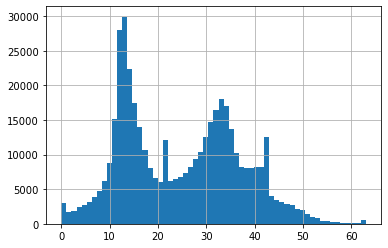

In [25]:
df['x_axis'].hist(bins=60)

<AxesSubplot:>

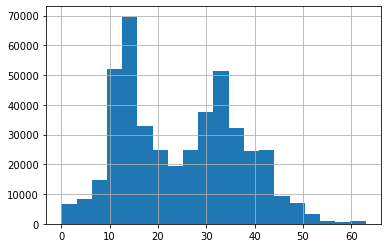

In [27]:
df['x_axis'].hist(bins=20)

By analysing the graph, the x-axis accelerations seem to fall roughly under a bimodal distribution, with a concentration around 14 and another around 33.

### 4 - Plot of number of occurrences per movement

In [28]:
df_movement_count = (df['movement'].value_counts()).rename_axis('movement').reset_index(name='occurrences')
df_movement_count

,movement,occurrences
0,Walk,92154
1,Getup_bed,45700
2,Drink_glass,42692
3,Pour_water,41573
4,Climb_stairs,40156
5,Eat_meat,31231
6,Brush_teeth,29817
7,Standup_chair,25315
8,Sitdown_chair,24936
9,Comb_hair,23473


<AxesSubplot:>

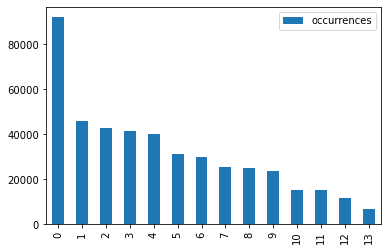

In [29]:
df_movement_count.plot(kind='bar')

The plot brings in visual form the amount of data the dataset has on each movement. We can see the most measurements we have is of the walking motion (labeled 0, with 92154 measurements) and the one we have the least measurements of is the soup eating movement (labeled 13, with 6680 measurements)